In [1]:
# pip install imbalanced-learn
# pip install shap
# pip install lime

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Read the Excel file into a DataFrame
data = pd.read_csv('final-data.csv')

# Display the first few rows
# data.head()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  444 non-null    int64  
 1   Release Date                444 non-null    object 
 2   Type                        444 non-null    object 
 3   Text                        444 non-null    object 
 4   Sentiment Score             444 non-null    float64
 5   Sentiment Category          444 non-null    object 
 6   FinBERT Sentiment           444 non-null    object 
 7   FinBERT Score               444 non-null    float64
 8   Average Sentiment Score     444 non-null    float64
 9   Hawkish_Count               444 non-null    int64  
 10  Dovish_Count                444 non-null    int64  
 11  Hawkish_to_Dovish_Ratio     444 non-null    float64
 12  Hawkish_Weighted_Count      444 non-null    int64  
 13  Topic                       444 non

In [7]:
data.head()

,Unnamed: 0,Release Date,Type,Text,Sentiment Score,Sentiment Category,FinBERT Sentiment,FinBERT Score,Average Sentiment Score,Hawkish_Count,...,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Bank_Loan_Rate,Real_Export_Rate,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Reserve
0,0,2000-02-02,Statement,The Federal Open Market Committee voted today ...,0.8555,Positive,Negative,0.999991,0.927746,2,...,75.10,71.85950,27.52,27.15,8.50,1280.897,19.401,7.83,5.64,4.826
1,1,2000-02-02,Minute,Minutes of the Federal Open Market Committee\n...,1.0000,Positive,Neutral,0.999991,0.999995,41,...,75.10,71.85950,27.52,27.15,8.50,1280.897,19.401,7.83,5.64,4.826
2,2,2000-03-21,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,Positive,Neutral,0.999984,0.999942,31,...,75.37,70.86146,28.01,24.93,8.75,1280.897,18.343,7.74,5.81,5.420
3,3,2000-03-21,Statement,The Federal Open Market Committee voted today ...,0.7783,Positive,Negative,0.999998,0.889149,2,...,75.37,70.86146,28.01,24.93,8.75,1280.897,18.343,7.74,5.81,5.420
4,4,2000-05-16,Minute,Minutes of the Federal Open Market Committee\n...,0.9999,Positive,Neutral,0.999983,0.999942,29,...,75.54,70.02296,29.76,28.78,9.00,1319.937,17.943,8.34,6.13,6.702


In [9]:
data['Decision'].head()

0    +0.25%
1    +0.25%
2    +0.25%
3    +0.25%
4    +0.50%
Name: Decision, dtype: object

In [11]:
data['Decision'].value_counts()

Decision
+0.00%    200
+0.25%     66
-0.50%     28
-0.25%     24
+0.75%      8
+0.50%      6
-0.75%      4
-1.00%      2
Name: count, dtype: int64

In [13]:
# Handle Imbalanced Classes

data['Decision'] = data['Decision'].replace({'+0.75%': '+0.50%', '-0.75%': '-0.50%', '-1.00%': '-0.50%'})
data['Decision'].value_counts()

Decision
+0.00%    200
+0.25%     66
-0.50%     34
-0.25%     24
+0.50%     14
Name: count, dtype: int64

In [15]:
data = data.dropna(subset=['Decision'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 443
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  338 non-null    int64  
 1   Release Date                338 non-null    object 
 2   Type                        338 non-null    object 
 3   Text                        338 non-null    object 
 4   Sentiment Score             338 non-null    float64
 5   Sentiment Category          338 non-null    object 
 6   FinBERT Sentiment           338 non-null    object 
 7   FinBERT Score               338 non-null    float64
 8   Average Sentiment Score     338 non-null    float64
 9   Hawkish_Count               338 non-null    int64  
 10  Dovish_Count                338 non-null    int64  
 11  Hawkish_to_Dovish_Ratio     338 non-null    float64
 12  Hawkish_Weighted_Count      338 non-null    int64  
 13  Topic                       338 non-null

In [19]:
# Drop irrelevant columns and handle missing values
data = data.drop(columns=['Unnamed: 0', 'Release Date', 'Announcement Date', 'Type', 'Time', 'Forecast', 'Text', 'High_Point', 'Sentiment Category', 'FinBERT Sentiment'], errors='ignore')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 443
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sentiment Score             338 non-null    float64
 1   FinBERT Score               338 non-null    float64
 2   Average Sentiment Score     338 non-null    float64
 3   Hawkish_Count               338 non-null    int64  
 4   Dovish_Count                338 non-null    int64  
 5   Hawkish_to_Dovish_Ratio     338 non-null    float64
 6   Hawkish_Weighted_Count      338 non-null    int64  
 7   Topic                       338 non-null    int64  
 8   Topic_Probabilities         338 non-null    float64
 9   Text_Length                 338 non-null    int64  
 10  Word_Count                  338 non-null    int64  
 11  tightening                  338 non-null    float64
 12  inflation                   338 non-null    float64
 13  rate hike                   338 non-null

In [23]:
data = data.dropna()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 0 to 443
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sentiment Score             338 non-null    float64
 1   FinBERT Score               338 non-null    float64
 2   Average Sentiment Score     338 non-null    float64
 3   Hawkish_Count               338 non-null    int64  
 4   Dovish_Count                338 non-null    int64  
 5   Hawkish_to_Dovish_Ratio     338 non-null    float64
 6   Hawkish_Weighted_Count      338 non-null    int64  
 7   Topic                       338 non-null    int64  
 8   Topic_Probabilities         338 non-null    float64
 9   Text_Length                 338 non-null    int64  
 10  Word_Count                  338 non-null    int64  
 11  tightening                  338 non-null    float64
 12  inflation                   338 non-null    float64
 13  rate hike                   338 non-null

In [27]:
data.head()

,Sentiment Score,FinBERT Score,Average Sentiment Score,Hawkish_Count,Dovish_Count,Hawkish_to_Dovish_Ratio,Hawkish_Weighted_Count,Topic,Topic_Probabilities,Text_Length,...,Eurozone_CPI,China_CPI,WTI_Crude_Oil,Brent_Crude_Oil,Bank_Loan_Rate,Real_Export_Rate,Total_Vehicle_Sales,Corporate_Yield,Effective_Rate,Fed_Reserve
0,0.8555,0.999991,0.927746,2,0,2.000000,6,15,1.000000,1265,...,75.10,71.85950,27.52,27.15,8.50,1280.897,19.401,7.83,5.64,4.826
1,1.0000,0.999991,0.999995,41,6,5.857143,117,3,0.143279,55539,...,75.10,71.85950,27.52,27.15,8.50,1280.897,19.401,7.83,5.64,4.826
2,0.9999,0.999984,0.999942,31,5,5.166667,85,3,0.147085,29277,...,75.37,70.86146,28.01,24.93,8.75,1280.897,18.343,7.74,5.81,5.420
3,0.7783,0.999998,0.889149,2,0,2.000000,6,15,0.939424,1310,...,75.37,70.86146,28.01,24.93,8.75,1280.897,18.343,7.74,5.81,5.420
4,0.9999,0.999983,0.999942,29,7,3.625000,75,3,0.142243,26721,...,75.54,70.02296,29.76,28.78,9.00,1319.937,17.943,8.34,6.13,6.702


In [29]:
data['Decision'].head()

0    +0.25%
1    +0.25%
2    +0.25%
3    +0.25%
4    +0.50%
Name: Decision, dtype: object

Accuracy Score: 0.594059405940594

Classification Report:
               precision    recall  f1-score   support

      +0.00%       0.61      0.95      0.74        62
      +0.25%       0.25      0.09      0.13        11
      +0.50%       1.00      0.00      0.00        12
      -0.25%       1.00      0.00      0.00        10
      -0.50%       1.00      0.00      0.00         6

    accuracy                           0.59       101
   macro avg       0.77      0.21      0.18       101
weighted avg       0.68      0.59      0.47       101



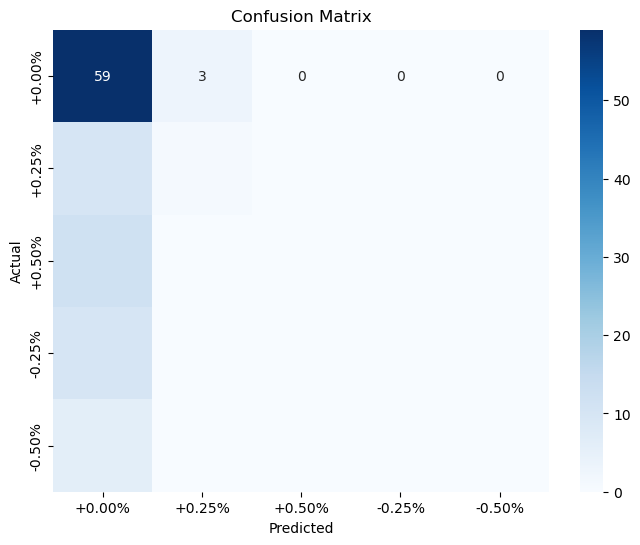

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Feature selection
features = data.drop(['Decision'], axis=1)  # 'Decision' is the target column
target = data['Decision']

# Split the data: Keep the last 'test_size' rows as the test set
test_size = int(0.3 * len(data))  # 30% for testing

# Split into training and testing data based on the chronological order
X_train = data.iloc[:-test_size].drop(['Decision'], axis=1)  # Features for training
y_train = data.iloc[:-test_size]['Decision']  # Target for training

X_test = data.iloc[-test_size:].drop(['Decision'], axis=1)  # Features for testing
y_test = data.iloc[-test_size:]['Decision']  # Target for testing

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=1500)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report with zero_division parameter set to 1 to avoid warning
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(target), yticklabels=np.unique(target))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
########################################

In [41]:
# Model Prediction

In [43]:
# Fit the model
# rf_model.fit(X_train, y_train)

# Predict the last 'Decision' (i.e., the last row in the test set)
last_prediction = rf_model.predict(X_test.iloc[[-1]])

print(f"Predicted Decision for the last observation: {last_prediction}")

Predicted Decision for the last observation: ['+0.00%']


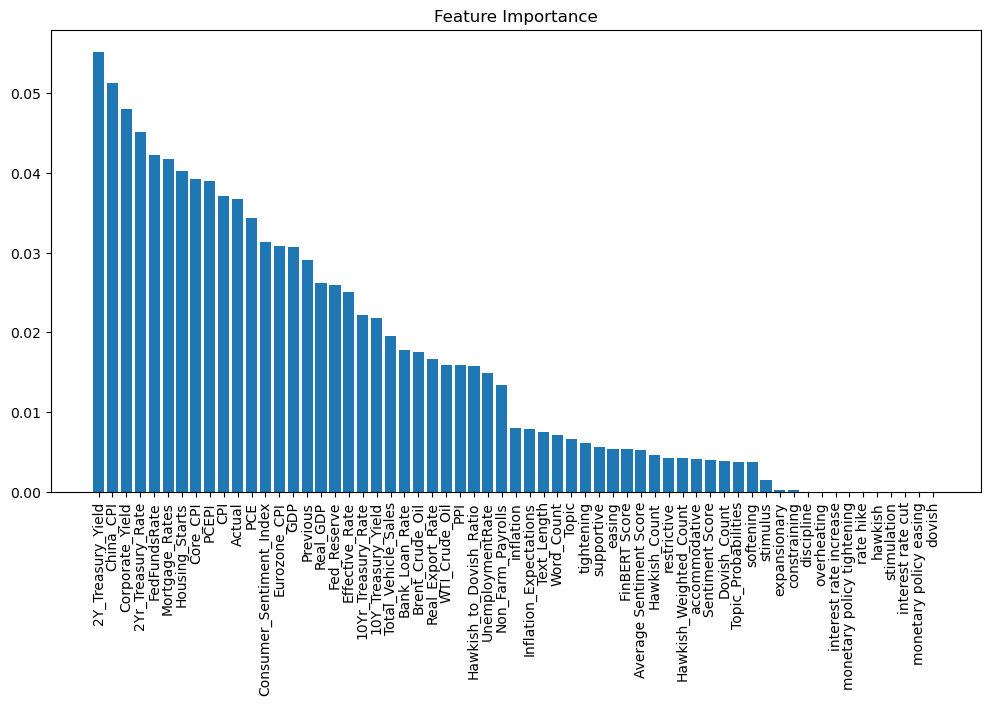

In [45]:
# Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(12, 6))
plt.bar(range(features.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(features.shape[1]), features.columns[sorted_indices], rotation=90)
plt.title("Feature Importance")
plt.show()

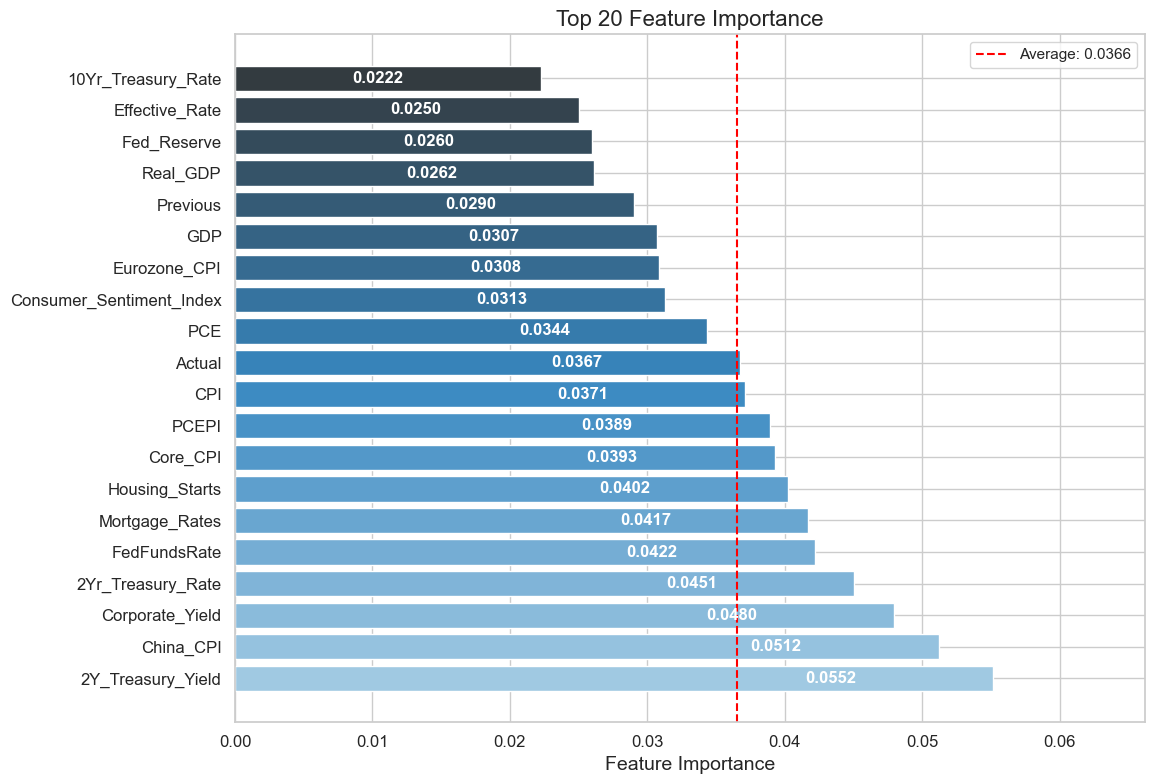

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Feature Importance
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 20 features
top_n = 20
top_indices = sorted_indices[:top_n]
top_features = features.columns[top_indices]
top_importances = feature_importances[top_indices]

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Create a horizontal bar plot for the top N features
plt.figure(figsize=(14, 8))  # Adjust width for better spacing
bars = plt.barh(range(top_n), top_importances, align="center", color=sns.color_palette("Blues_d", n_colors=top_n))

# Adjust text labels inside bars if possible
for bar in bars:
    width = bar.get_width()
    if width > 0.1 * max(top_importances):  # If the bar is long, place text inside
        plt.text(width - 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', 
                 va='center', ha='right', fontsize=12, color='white', fontweight='bold')
    else:  # If the bar is short, place text outside
        plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', 
                 va='center', ha='left', fontsize=12, color='black')

# Add labels, title, and customize appearance
plt.yticks(range(top_n), top_features, fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel('Feature Importance', fontsize=14)
plt.title('Top 20 Feature Importance', fontsize=16)

# Add a horizontal line for the average feature importance
avg_importance = np.mean(top_importances)
plt.axvline(avg_importance, color='red', linestyle='--', label=f'Average: {avg_importance:.4f}')
plt.legend()

# Adjust x-axis limits to prevent overflow
plt.xlim(0, max(top_importances) * 1.2)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(left=0.3, right=0.95)  # Add space for long feature names

# Show plot
plt.show()


In [49]:
"""
# Hyperparameter tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("\nBest Parameters from Grid Search:\n", grid_search.best_params_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)

print("\nTuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))
print("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))
"""

'\n# Hyperparameter tuning with GridSearchCV\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [100, 200, 300, 500, 1000],\n    \'max_depth\': [None, 10, 20, 30],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4]\n}\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=\'accuracy\', cv=3, verbose=2, n_jobs=-1)\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint("\nBest Parameters from Grid Search:\n", grid_search.best_params_)\n\n# Evaluate the tuned model\nbest_rf_model = grid_search.best_estimator_\ny_pred_tuned = best_rf_model.predict(X_test)\n\nprint("\nTuned Model Accuracy Score:", accuracy_score(y_test, y_pred_tuned))\nprint("\nTuned Model Classification Report:\n", classification_report(y_test, y_pred_tuned))\n'

Last observation probabilities (summing to 1): [[0.56733333 0.27533333 0.00066667 0.09266667 0.064     ]] Sum: 1.0


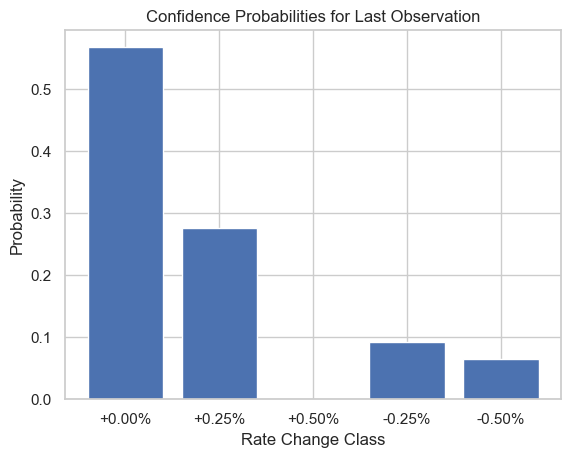

In [51]:
# Get the probabilities for the last observation in X_test
probabilities_single = rf_model.predict_proba(X_test.iloc[[-1]])  # Get last row of X_test

# Print the probability distribution for that specific observation
print("Last observation probabilities (summing to 1):", probabilities_single, "Sum:", sum(probabilities_single[0]))

# Visualize the probabilities for the last observation
classes = rf_model.classes_
plt.bar(classes, probabilities_single[0])
plt.title(f"Confidence Probabilities for Last Observation")
plt.xlabel("Rate Change Class")
plt.ylabel("Probability")
plt.show()


Last observation probabilities (summing to 1): [[0.56733333 0.27533333 0.00066667 0.09266667 0.064     ]] Sum: 1.0


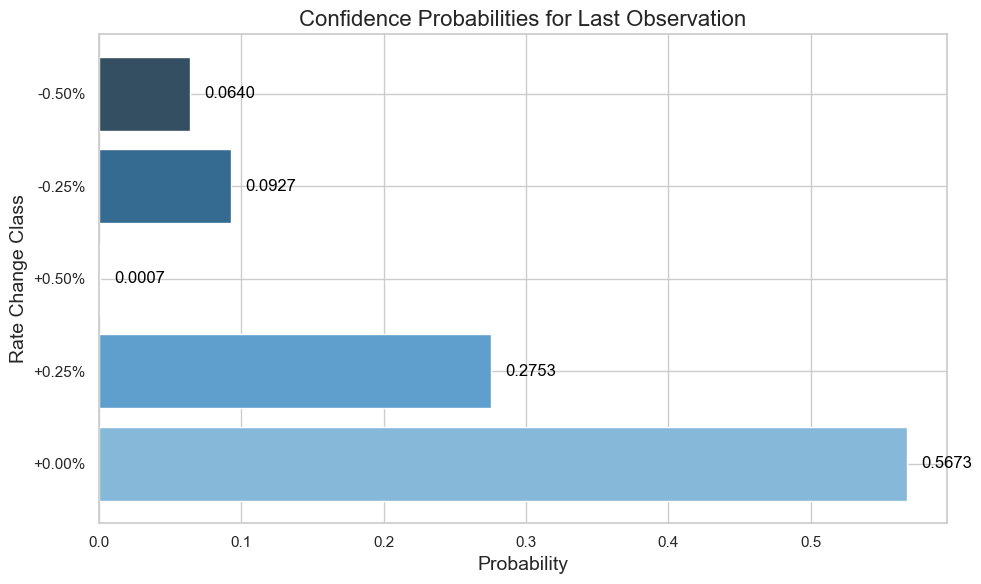

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the probabilities for the last observation in X_test
probabilities_single = rf_model.predict_proba(X_test.iloc[[-1]])  # Get last row of X_test

# Print the probability distribution for that specific observation
print("Last observation probabilities (summing to 1):", probabilities_single, "Sum:", sum(probabilities_single[0]))

# Visualize the probabilities for the last observation
classes = rf_model.classes_

# Set seaborn style for a cleaner look
sns.set(style="whitegrid")

# Create a horizontal bar plot for the probabilities
plt.figure(figsize=(10, 6))
bars = plt.barh(classes, probabilities_single[0], color=sns.color_palette("Blues_d", n_colors=len(classes)))

# Add labels to the bars (the probability values)
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.4f}', va='center', ha='left', fontsize=12, color='black')

# Add title and labels
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Rate Change Class', fontsize=14)
plt.title(f'Confidence Probabilities for Last Observation', fontsize=16)

# Show plot
plt.tight_layout()
plt.show()


Observation probabilities (summing to 1):
Observation 1: [0.416      0.58       0.         0.00066667 0.00333333], Sum: 1.0
Observation 2: [0.64266667 0.32266667 0.00066667 0.018      0.016     ], Sum: 1.0
Observation 3: [0.50533333 0.45333333 0.         0.02666667 0.01466667], Sum: 0.9999999999999999
Observation 4: [0.416      0.55733333 0.         0.018      0.00866667], Sum: 1.0
Observation 5: [0.51933333 0.46933333 0.00066667 0.00666667 0.004     ], Sum: 1.0
Accuracy: 0.594059405940594
              precision    recall  f1-score   support

      +0.00%       0.61      0.95      0.74        62
      +0.25%       0.25      0.09      0.13        11
      +0.50%       0.00      0.00      0.00        12
      -0.25%       0.00      0.00      0.00        10
      -0.50%       0.00      0.00      0.00         6

    accuracy                           0.59       101
   macro avg       0.17      0.21      0.18       101
weighted avg       0.40      0.59      0.47       101



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


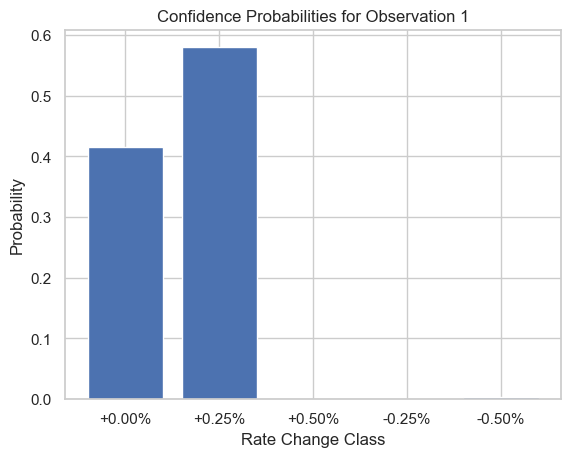

In [55]:
# Predict probabilities
probabilities = rf_model.predict_proba(X_test)

# Display probabilities for the first 5 samples (as an example)
print("Observation probabilities (summing to 1):")
for i in range(5):
    print(f"Observation {i+1}: {probabilities[i]}, Sum: {sum(probabilities[i])}")

# Evaluate the model
predictions = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Visualize confidence probabilities for a specific sample
observation_idx = 0
classes = rf_model.classes_
plt.bar(classes, probabilities[observation_idx])
plt.title(f"Confidence Probabilities for Observation {observation_idx + 1}")
plt.xlabel("Rate Change Class")
plt.ylabel("Probability")
plt.show()

In [57]:
# Cross-validation to validate model stability
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation Accuracy Scores: [0.625      0.9375     0.82978723 0.74468085 0.40425532]
Mean CV Accuracy: 0.7082446808510638


In [58]:
# Macro-Averaged F1-Score Explicitly

from sklearn.metrics import f1_score

macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"Macro-Averaged F1-Score: {macro_f1:.2f}")

Macro-Averaged F1-Score: 0.18


In [61]:
from lime.lime_tabular import LimeTabularExplainer

# Initialize the LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Use the training data
    mode='classification',
    feature_names=X_train.columns,  # Feature names for interpretability
    class_names=rf_model.classes_,  # Target class names
    discretize_continuous=True
)

# Explain a single prediction
observation_idx = 0  # Index of the observation to explain
exp = explainer.explain_instance(
    X_test.iloc[observation_idx].values,  # Observation to explain
    rf_model.predict_proba,  # Predict function of the model
    num_features=10  # Number of features to show in the explanation
)

# Display the explanation
exp.show_in_notebook(show_table=True)  # Interactive explanation in a Jupyter Notebook
exp.save_to_file('lime_explanation.html')  # Save explanation to an HTML file

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


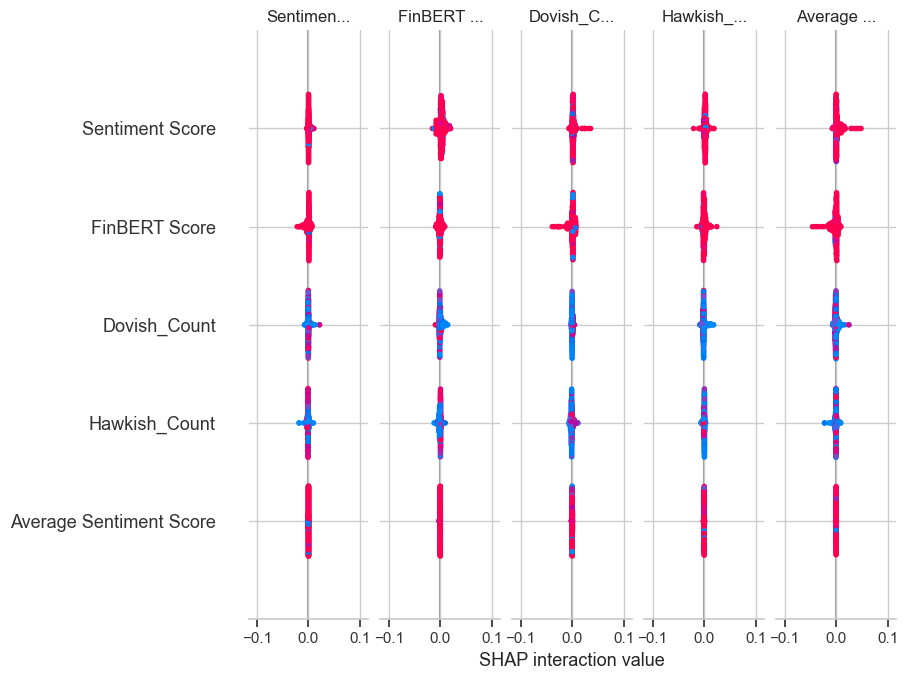

In [63]:
# SHAP
import shap

# SHAP explanation
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(features)

shap.summary_plot(shap_values, features, plot_type='bar')

In [64]:
####################


In [71]:
'''
from flaml import AutoML
from sklearn.metrics import accuracy_score

# Define FLAML AutoML settings
automl = AutoML()

automl_settings = {
    "time_budget": 300,  # 10 minutes search time
    "metric": "accuracy",  # Optimize for accuracy
    "task": "classification",
    "estimator_list": ["rf"],  # Only search for RandomForestClassifier
    "log_file_name": "flaml_random_forest.log",
    "n_jobs": -1,
}

# Run FLAML AutoML
automl.fit(X_train=X_train, y_train=y_train, **automl_settings)

# Get best model and parameters
print("Best Model:", automl.model)
print("Best Parameters:", automl.best_config)

# Make predictions
y_pred = automl.predict(X_test)

# Evaluate performance
print("Final Model Accuracy:", accuracy_score(y_test, y_pred))
'''

'\nfrom flaml import AutoML\nfrom sklearn.metrics import accuracy_score\n\n# Define FLAML AutoML settings\nautoml = AutoML()\n\nautoml_settings = {\n    "time_budget": 300,  # 10 minutes search time\n    "metric": "accuracy",  # Optimize for accuracy\n    "task": "classification",\n    "estimator_list": ["rf"],  # Only search for RandomForestClassifier\n    "log_file_name": "flaml_random_forest.log",\n    "n_jobs": -1,\n}\n\n# Run FLAML AutoML\nautoml.fit(X_train=X_train, y_train=y_train, **automl_settings)\n\n# Get best model and parameters\nprint("Best Model:", automl.model)\nprint("Best Parameters:", automl.best_config)\n\n# Make predictions\ny_pred = automl.predict(X_test)\n\n# Evaluate performance\nprint("Final Model Accuracy:", accuracy_score(y_test, y_pred))\n'

In [73]:
####################


In [67]:
import pickle

# Save the model
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)